# Задание 1

Загрузим данные непосредственно из задания (по ссылке).

In [3]:
import pandas as pd

In [2]:
link = 'https://studio.openedu.ru/assets/courseware/v1/a80d63dbbd600f4c6621c911a5bb7305/asset-v1:ITMOUniversity+DATANTECH2035+fall_2021+type@asset+block/mumps.csv'

In [6]:
mumps = pd.read_csv(link)

Убедимся, что данные загружены корректно

In [7]:
mumps.head()

,Region;Cname;Year;Number of cases
0,Eastern Mediterranean;Afghanistan;2010;0
1,Europe;Albania;2010;21
2,Africa;Algeria;2010;0
3,Europe;Andorra;2010;0
4,Africa;Angola;2010;0


Не очень хорошо...

Тогда так:

In [8]:
mumps = pd.read_csv(link, sep=';')
mumps.head()

,Region,Cname,Year,Number of cases
0,Eastern Mediterranean,Afghanistan,2010,0.0
1,Europe,Albania,2010,21.0
2,Africa,Algeria,2010,0.0
3,Europe,Andorra,2010,0.0
4,Africa,Angola,2010,0.0


Выберем только интересующую нас страну

In [11]:
mumps_sample = mumps[mumps['Cname'] == 'Argentina']
mumps_sample

,Region,Cname,Year,Number of cases
6,America,Argentina,2010,5083.0
200,America,Argentina,2011,5481.0
394,America,Argentina,2012,4619.0
588,America,Argentina,2013,3772.0
782,America,Argentina,2014,87.0
976,America,Argentina,2015,156.0
1170,America,Argentina,2016,74.0
1364,America,Argentina,2017,4396.0
1558,America,Argentina,2018,7715.0


In [13]:
mumps_sample['Year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

Построим столбчатую диаграмму

In [14]:
import matplotlib.pyplot as plt

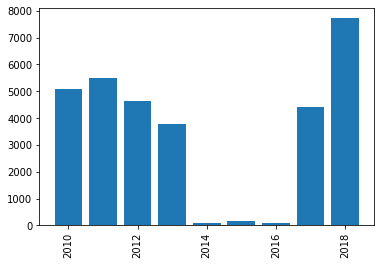

In [15]:
plt.bar(mumps_sample['Year'], mumps_sample['Number of cases'])
plt.xticks(rotation = 'vertical')
plt.show()

# Задание 2

Загрузим данные о регионах

In [16]:
regions = pd.read_csv('regions.csv')
regions.head()

,Регион,Округ
0,Алтайский край,Сибирский
1,Амурская область,Дальневосточный
2,Архангельская область,Северо-Западный
3,Белгородская область,Центральный
4,Брянская область,Центральный


Загрузим данные о потребляемой электроэнергии субъектами

In [17]:
electricity = pd.read_csv('data.csv')
electricity.head()

,Субъект,1990,1995,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Белгородская область,11987.5,10661.0,11118.9,11041.5,11232.6,11662.5,11836.6,11952.7,13618.2,14261.2,14071.9,13344.0,14393.2
1,Брянская область,5670.0,3987.3,3422.1,3512.7,3563.7,3645.3,4015.2,4089.8,3929.3,4055.8,3820.5,3853.3,3936.0
2,Владимирская область,9042.5,6121.9,6100.9,6319.5,6398.7,6424.6,6560.5,6509.3,6661.8,6929.2,7025.6,6724.3,6979.1
3,Воронежская область,12218.1,8986.3,9142.3,9065.2,9201.3,9385.2,9134.0,9099.1,9379.6,9697.8,10003.2,9929.8,10078.8
4,Ивановская область,6696.9,4164.4,4302.2,4286.9,4297.9,4169.8,4127.8,4078.2,4082.2,4101.4,4004.6,3926.9,3846.7


Выберем из регионов те, которые находятся в интересующем нас округе. Переименуем колонки (для удобства)

In [20]:
regions_sample = regions[regions['Округ'] == 'Северо-Западный']
regions_sample.columns = ['Субъект', 'Округ']
regions_sample

,Субъект,Округ
2,Архангельская область,Северо-Западный
6,Вологодская область,Северо-Западный
9,г. Санкт-Петербург,Северо-Западный
14,Калининградская область,Северо-Западный
24,Ленинградская область,Северо-Западный
28,Мурманская область,Северо-Западный
30,Новгородская область,Северо-Западный
38,Псковская область,Северо-Западный
44,Республика Карелия,Северо-Западный
45,Республика Коми,Северо-Западный


Пересечем две таблицы по столбцу Субъект

In [22]:
final = pd.merge(electricity, regions_sample, how = 'inner', on = ['Субъект'])
final

,Субъект,1990,1995,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,Округ
0,Республика Карелия,8831.2,6998.0,7651.7,7683.7,7777.4,8019.1,8369.0,8670.4,8919.2,8987.2,9182.0,8719.3,8100.0,Северо-Западный
1,Республика Коми,9984.1,7941.0,7797.2,8014.7,7987.6,7963.4,8135.0,8040.5,8465.4,8697.8,8825.9,8770.1,8832.3,Северо-Западный
2,Архангельская область,8835.0,6919.9,7105.9,7416.2,7532.9,7640.4,7898.2,8154.5,14244.5,8604.5,9024.2,8791.1,9131.2,Северо-Западный
3,Вологодская область,13788.1,11670.6,12495.6,12475.8,12644.8,12798.3,13289.4,13481.8,13362.2,13976.4,14500.9,12986.1,13884.5,Северо-Западный
4,Калининградская область,3234.9,2756.9,2980.3,3211.9,3255.5,3428.7,3535.1,4054.2,3767.8,3835.6,3926.6,3832.6,4018.0,Северо-Западный
5,Ленинградская область,16271.2,10887.7,13315.5,13907.7,14800.8,14869.2,14678.5,17510.0,20230.7,17045.1,18208.5,17857.7,19396.2,Северо-Западный
6,Мурманская область,16573.5,13450.4,12665.8,12649.7,12440.7,12426.1,12612.1,12624.8,12923.9,12888.0,12956.2,12374.5,12570.3,Северо-Западный
7,Новгородская область,4460.1,3141.5,3050.4,3085.9,3109.0,3218.3,3431.5,3514.1,3653.1,3406.9,3553.9,3358.3,3711.6,Северо-Западный
8,Псковская область,2978.8,2176.5,2005.5,2016.4,1986.3,1958.8,1957.2,1942.6,2032.8,2042.5,2099.4,2092.6,2134.1,Северо-Западный
9,г. Санкт-Петербург,19732.7,16243.6,16557.6,18961.0,20048.2,19180.0,19599.1,20618.9,20344.8,19919.0,20983.5,21305.4,23862.7,Северо-Западный


Вычислим требуемую сумму

In [27]:
final['2001'].sum()

89423.0

# Задание 3

Обратимся к уже известным нам данным

In [28]:
electricity.head()

,Субъект,1990,1995,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Белгородская область,11987.5,10661.0,11118.9,11041.5,11232.6,11662.5,11836.6,11952.7,13618.2,14261.2,14071.9,13344.0,14393.2
1,Брянская область,5670.0,3987.3,3422.1,3512.7,3563.7,3645.3,4015.2,4089.8,3929.3,4055.8,3820.5,3853.3,3936.0
2,Владимирская область,9042.5,6121.9,6100.9,6319.5,6398.7,6424.6,6560.5,6509.3,6661.8,6929.2,7025.6,6724.3,6979.1
3,Воронежская область,12218.1,8986.3,9142.3,9065.2,9201.3,9385.2,9134.0,9099.1,9379.6,9697.8,10003.2,9929.8,10078.8
4,Ивановская область,6696.9,4164.4,4302.2,4286.9,4297.9,4169.8,4127.8,4078.2,4082.2,4101.4,4004.6,3926.9,3846.7


Выберем Смоленскую область, удалим ненужные колонки

In [40]:
electricity_sample = electricity[electricity['Субъект'] == 'Владимирская область']
electricity_sample

,Субъект,1990,1995,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
2,Владимирская область,9042.5,6121.9,6100.9,6319.5,6398.7,6424.6,6560.5,6509.3,6661.8,6929.2,7025.6,6724.3,6979.1


Определим статистические характеристики за 2000 — 2010 годы.

In [41]:
electricity_sample = electricity_sample.drop(labels = ['Субъект', '1990', '1995'], axis = 1)
electricity_sample

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
2,6100.9,6319.5,6398.7,6424.6,6560.5,6509.3,6661.8,6929.2,7025.6,6724.3,6979.1


Вычислим медиану

In [43]:
electricity_sample_transp = electricity_sample.T
electricity_sample_transp.columns = ['Потребление']
electricity_sample_transp

,Потребление
2000,6100.9
2001,6319.5
2002,6398.7
2003,6424.6
2004,6560.5
2005,6509.3
2006,6661.8
2007,6929.2
2008,7025.6
2009,6724.3


In [44]:
electricity_sample_transp.median()

Потребление    6560.5
dtype: float64

Вычислим дисперсию

In [46]:
electricity_sample_transp.var()

Потребление    86124.716727
dtype: float64

Вычислим размах

In [48]:
electricity_sample_transp.max() - electricity_sample_transp.min()

Потребление    924.7
dtype: float64

# Задание 4

Загрузим скопированные данные

In [50]:
series = pd.DataFrame([33, 49, 38, 44, 48, 52, 37, 55, 39, 59, 41, 42, 54, 63, 53, 50, 47, 57, 58, 56, 51, 69, 64, 67, 75])
series

,0
0,33
1,49
2,38
3,44
4,48
5,52
6,37
7,55
8,39
9,59


Преобразуем данные в формат, который используется в `numpy`

In [51]:
import numpy as np

In [52]:
X = series.index.to_numpy()
y = series[0].to_numpy()

Аппроксимируем данные многочленом первой степени. Коэффициенты многочлена находятся при помощи МНК

In [53]:
poly = np.polyfit(X, y, 1)
print(poly)
a = poly[0]
b = poly[1]

[ 1.09615385 38.88615385]


Вычислим прогнозируемые трендом значения временного ряда

In [54]:
x = np.arange(0, 25)
series['lin_trend'] = a * x + b
series

,0,lin_trend
0,33,38.886154
1,49,39.982308
2,38,41.078462
3,44,42.174615
4,48,43.270769
5,52,44.366923
6,37,45.463077
7,55,46.559231
8,39,47.655385
9,59,48.751538


Вычислим $R^2$

In [55]:
f_i = series['lin_trend']
y_avg = series[0].mean()
R2 = 1 - ((y - f_i) ** 2).sum() / ((y - y_avg) ** 2).sum()
round(R2, 3)

0.57

In [57]:
from sklearn.metrics import r2_score

round(r2_score(series[0], series['lin_trend']), 3)

0.57

# Задание 5


Загрузим данные о ресторанах

In [63]:
rest = pd.read_csv('https://cdn.openedu.ru/EACAFQQ/ITMOUniversity+DATST+spring_2021_ITMO_bac+type@asset+block@task-9cfcb652-7cc6-11eb-adfa-367dda533c29.csv')
rest

,ID,GUESTS,INCOME,STARS
0,GARJ,820,543461,5
1,7BMJ,682,301003,6
2,XJ8I,385,464906,3
3,FABM,642,207447,2
4,E71L,652,513318,2
...,...,...,...,...
195,S8S8,561,252017,3
196,TCXW,866,280781,4
197,HZGC,433,576841,9
198,1OUC,877,403547,8


In [64]:
rest = rest.set_index('ID')
rest.head()

,GUESTS,INCOME,STARS
ID,,,
GARJ,820,543461,5
7BMJ,682,301003,6
XJ8I,385,464906,3
FABM,642,207447,2
E71L,652,513318,2


Отнормируем данные

In [65]:
rest_normed = (rest - rest.min())/(rest.max() - rest.min())
rest_normed

,GUESTS,INCOME,STARS
ID,,,
GARJ,0.870588,0.575496,0.428571
7BMJ,0.638655,0.160235,0.571429
XJ8I,0.139496,0.440953,0.142857
FABM,0.571429,0.000000,0.000000
E71L,0.588235,0.523869,0.000000
...,...,...,...
S8S8,0.435294,0.076336,0.142857
TCXW,0.947899,0.125600,0.285714
HZGC,0.220168,0.632666,1.000000


Вычислим значение целевой функции

In [66]:
rest_normed['SUM'] = rest_normed.iloc[:,:3].sum(axis=1)
rest_normed

,GUESTS,INCOME,STARS,SUM
ID,,,,
GARJ,0.870588,0.575496,0.428571,1.874655
7BMJ,0.638655,0.160235,0.571429,1.370319
XJ8I,0.139496,0.440953,0.142857,0.723306
FABM,0.571429,0.000000,0.000000,0.571429
E71L,0.588235,0.523869,0.000000,1.112105
...,...,...,...,...
S8S8,0.435294,0.076336,0.142857,0.654487
TCXW,0.947899,0.125600,0.285714,1.359214
HZGC,0.220168,0.632666,1.000000,1.852834


In [67]:
#rest_normed['SUM'] = rest_normed['GUESTS'] + rest_normed['INCOME'] + rest_normed['STARS']

Отсортируем по значениям целевой функции

In [68]:
rest_normed.sort_values(by = ['SUM'], ascending = False)

,GUESTS,INCOME,STARS,SUM
ID,,,,
2QP7,0.902521,0.936912,1.000000,2.839433
TYCX,0.855462,0.809068,1.000000,2.664531
3290,0.710924,0.944035,1.000000,2.654960
O4O6,0.939496,0.988669,0.714286,2.642450
74TW,0.927731,0.756240,0.857143,2.541114
...,...,...,...,...
JQKT,0.349580,0.034540,0.000000,0.384120
4Q4X,0.134454,0.083861,0.142857,0.361172
8Q6N,0.000000,0.043030,0.285714,0.328744


In [69]:
rest_normed.sort_values(by = ['SUM'], ascending = False).iloc[:3]

,GUESTS,INCOME,STARS,SUM
ID,,,,
2QP7,0.902521,0.936912,1.0,2.839433
TYCX,0.855462,0.809068,1.0,2.664531
3290,0.710924,0.944035,1.0,2.654960


In [72]:
rest_normed.sort_values(by = ['SUM'], ascending = False).iloc[:3].index

Index(['2QP7', 'TYCX', '3290'], dtype='object', name='ID')

In [73]:
list(rest_normed.sort_values(by = ['SUM'], ascending = False).iloc[:3].index)

['2QP7', 'TYCX', '3290']